# DryBeenClassification

In [32]:
#import Important liabraries
import pandas as pd
import numpy as np

In [2]:
#Read Downloaded dataset
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

#findin the shape of dataset
print("original dataset shape::::",df.shape)

#use sklearn model to split dataset into training and test
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.20, random_state=42)

#splotting train_data into train and validation datasets seperatly

train2, val = train_test_split(train_data, test_size=0.20, random_state=42)

print("Training dataset new shape and length :::", train2.shape)
print("Testing dataset new shape and length :::", test_data.shape)
print("Validation dataset new shape and length :::", val.shape)


original dataset shape:::: (13611, 17)
Training dataset new shape and length ::: (8710, 17)
Testing dataset new shape and length ::: (2723, 17)
Validation dataset new shape and length ::: (2178, 17)


In [3]:
#'dict', 'list', 'series', 'split', 'records', 'index' 
#convet all datasets in to dictionary for insertion into mongodb.

train_data = train2.to_dict(orient='records')
test_data = test_data.to_dict(orient='records')
val_data=val.to_dict(orient='records')

print("converted data into dictionary format...>>>>>")


converted data into dictionary format...>>>>>


In [5]:
#import datasets into Mongo-db
import pymongo

#create connection to mongodb local host at ipadd:27017
myclient = pymongo.MongoClient('mongodb://localhost:27017/')

#create database in mongo db
mydb = myclient['project080422']

#create collections in mydb databases
mycol_train = mydb['train_data']
mycol_test = mydb['test_data']
mycol_val = mydb['validation_data']

#Insert data into collection
train = mycol_train.insert_many(train_data)
test = mycol_test.insert_many(test_data)
val = mycol_val.insert_many(val_data)
print("all data is inserted into Mongodb database>>>>>>>>>>>>..")

all data is inserted into Mongodb database>>>>>>>>>>>>..


## Export data from database to CSV for training

In [9]:
#printing list of databased present in mongodb
print(myclient.list_database_names())

['Images', 'MachineLearning', 'WebScraching', 'admin', 'config', 'database', 'local', 'project080422', 'shubhamdata']


In [8]:
#printing list of of collections presert in respected databse (project080422).
print(mydb.list_collection_names())

['test_data', 'train_data', 'validation_data']


In [16]:
allrecords = mydb.train_data.find()
list_courser = list(allrecords)

In [19]:
#creating dataframe from fetched data from database and droping "_id " columns from database.
df = pd.DataFrame(list_courser).drop('_id',axis=1)

#converting this dataframe to .csv file for better training.
df.to_csv("Train_data.csv")
print("data is downloaded from batabase and converted CSV>.....>>>>>>>>>>")

## Reading data form csv file

In [3]:
#impotr liabraries for data visualization and pre processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Reading data form csv file
df = pd.read_csv('Train_data.csv').drop('Unnamed: 0', axis=1)

## Data preprocessing

In [5]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

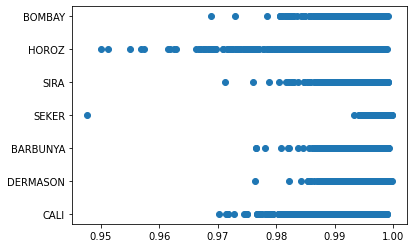

In [6]:
plt.scatter(df['ShapeFactor4'],df['Class'])

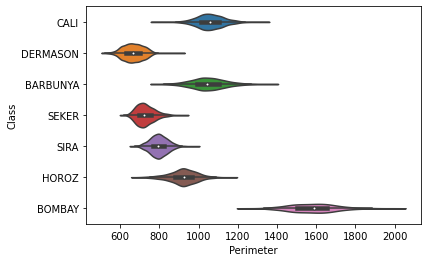

In [7]:
sns.violinplot(df['Perimeter'],df['Class'])
plt.show()

## Splitting data into train and test validation data

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class',axis=1), df['Class'], test_size=0.3)

### Scaling data

In [9]:
#Call the sklearn librart and import scaler values
from sklearn.preprocessing import StandardScaler

In [10]:
#call Standardscaler 
std_scaler = StandardScaler()

#fit valuse to function
df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = std_scaler.fit_transform(df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

In [11]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.330912,0.386530,0.433875,0.495376,0.032255,0.291966,0.322093,0.500201,0.523431,0.733752,0.387430,-0.140419,-0.772249,-0.572536,-0.177576,0.216201,CALI
1,-0.751323,-0.970132,-0.999753,-0.742657,-0.793135,-0.626813,-0.751045,-0.917106,0.602389,0.045553,0.960892,0.779499,0.880266,1.166401,0.762340,0.606074,DERMASON
2,-0.534835,-0.542571,-0.442787,-0.738557,0.354647,0.544892,-0.533876,-0.589511,0.490536,-0.144853,-0.223697,-0.438334,0.872534,-0.088780,-0.468073,0.620389,DERMASON
3,-0.838653,-1.108484,-1.062127,-0.976051,-0.554184,-0.308867,-0.841153,-1.058738,-0.611467,0.702922,1.079409,0.503923,1.317531,1.097331,0.473973,0.848791,DERMASON
4,-0.737199,-0.942103,-1.016637,-0.665065,-0.942534,-0.855065,-0.736089,-0.894760,0.276420,-0.127050,0.879464,0.958400,0.751141,1.298062,0.952659,0.371536,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,-0.523127,-0.658593,-0.767307,-0.287204,-0.978055,-0.913226,-0.526196,-0.572625,0.575449,0.526200,0.947451,1.006290,0.158946,0.971710,1.004021,0.455453,DERMASON
8706,0.090329,0.438030,0.666897,-0.294405,1.687310,1.251453,0.087988,0.224043,-0.820177,0.143831,-1.620703,-1.531655,0.182040,-1.142907,-1.475919,-0.038939,HOROZ
8707,-0.252832,-0.240543,-0.275875,-0.129586,-0.300788,-0.022607,-0.254466,-0.202272,-0.063166,0.166416,0.248748,0.216814,-0.061933,0.060277,0.179725,0.662426,BARBUNYA
8708,0.889880,1.166828,0.726068,1.389776,-0.569794,-0.328088,0.897847,1.087015,0.127090,-0.831444,-0.997073,0.498399,-1.534268,-0.504662,0.468253,0.051540,BARBUNYA


In [12]:
import seaborn as sns

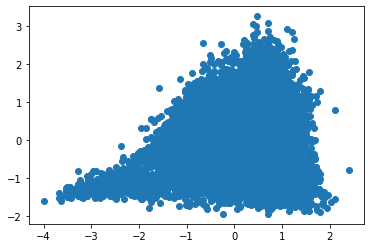

In [13]:
plt.scatter(df['Extent'],df['ShapeFactor2'])

In [14]:
len(df["Class"].unique())

7

## Data Clustering

In [15]:
#Importing KMeans for clustering
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=7, init='k-means++')
kmeans= kmeans.fit(df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

In [17]:
df['Clusters'] = kmeans.labels_

In [18]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Clusters
0,0.330912,0.386530,0.433875,0.495376,0.032255,0.291966,0.322093,0.500201,0.523431,0.733752,0.387430,-0.140419,-0.772249,-0.572536,-0.177576,0.216201,CALI,2
1,-0.751323,-0.970132,-0.999753,-0.742657,-0.793135,-0.626813,-0.751045,-0.917106,0.602389,0.045553,0.960892,0.779499,0.880266,1.166401,0.762340,0.606074,DERMASON,4
2,-0.534835,-0.542571,-0.442787,-0.738557,0.354647,0.544892,-0.533876,-0.589511,0.490536,-0.144853,-0.223697,-0.438334,0.872534,-0.088780,-0.468073,0.620389,DERMASON,0
3,-0.838653,-1.108484,-1.062127,-0.976051,-0.554184,-0.308867,-0.841153,-1.058738,-0.611467,0.702922,1.079409,0.503923,1.317531,1.097331,0.473973,0.848791,DERMASON,4
4,-0.737199,-0.942103,-1.016637,-0.665065,-0.942534,-0.855065,-0.736089,-0.894760,0.276420,-0.127050,0.879464,0.958400,0.751141,1.298062,0.952659,0.371536,DERMASON,4


In [19]:
df.Clusters.unique()

array([2, 4, 0, 5, 3, 6, 1])

## Get best model of each cluster

In [20]:
def optimal_k_means(data, max_k):
    means =[]
    inertias =[]
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate Elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

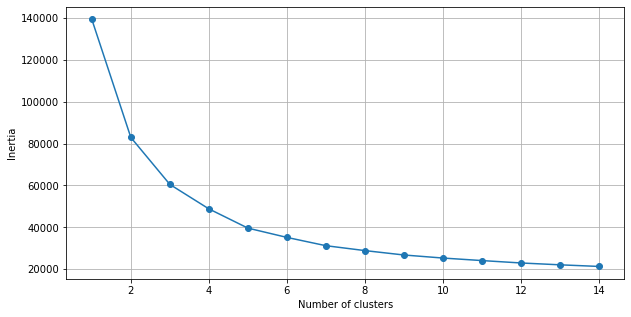

In [21]:
optimal_k_means(df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']], 15)

## Model selection usig RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
#Defining the model and finding it best parameters

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)
forest_clf.score(X_test,y_test)

0.9215461155759663

## HyperParameter Tuning 

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = { 
    'n_estimators': [20,30,40,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [26]:
CV_rfc = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 30, 40, 50, 100]})

In [27]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [28]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=40)

In [29]:
cvres = CV_rfc.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
    

nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 20}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 30}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 40}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 50}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 20}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 30}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 40}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
nan {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 20}
nan {'criterion': 'gini', 'max_depth': 4, 'max_featu

In [30]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=8, criterion='entropy')

In [31]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=500, random_state=42)

In [32]:
pred=rfc1.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9196326061997704


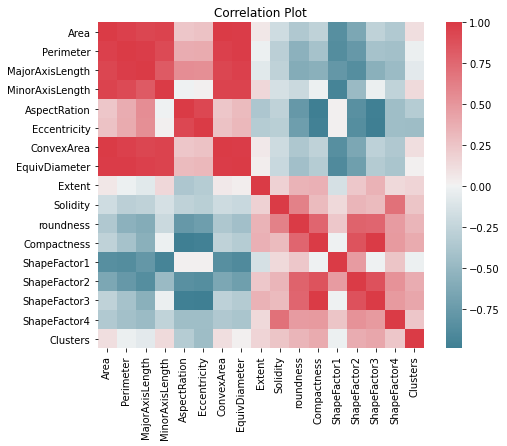

In [34]:
# Finding correlation plot in this

cor= df.corr(method='pearson')
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()